# Исследование надежности заемщиков

**Цель исследования**

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели *кредитного скоринга* — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Ответить на основные вопросы:**

1. Есть ли зависимость между количеством детей и возвратом кредита в срок?
2. Есть ли зависимость между семейным положением и возвратом кредита в срок?
3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
4. Как разные цели кредита влияют на его возврат в срок?

## Описание данных
* `children` — количество детей в семье

* `days_employed` — общий трудовой стаж в днях

* `dob_years` — возраст клиента в годах

* `education` — уровень образования клиента

* `education_id` — идентификатор уровня образования

* `family_status` — семейное положение

* `family_status_id` — идентификатор семейного положения

* `gender` — пол клиента

* `income_type` — тип занятости

* `debt` — имел ли задолженность по возврату кредитов

* `total_income` — ежемесячный доход

* `purpose` — цель получения кредита

### Шаг 1. Обзор данных

In [3]:
# Дома проект делался в google colab, поэтому игнорируем монтирование диска в других
try:
  from google.colab import drive
  drive.mount('/content/drive')
except:
  pass

In [4]:
import pandas as pd

# Пробуем другой путь, если проект открывается не в colab
try:
  data = pd.read_csv('/content/drive/MyDrive/Data analyst/data.csv')
except:
  data = pd.read_csv('/datasets/data.csv')

# Проверяем подключение файла, осматриваемся
print(data.shape)

(21525, 12)


In [5]:
# Получаем расширенную информацию о таблице, смотрим на корректность названия колонок
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
None


Видно, что в двух колонках есть пропуски. Названия колонок корректны.

In [6]:
# Щупаем данные, вскрываем поверхность
display(data.head(10))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


В таблице данные заёмщиков, где видны личные данные, в т.ч. доход клиента.

Есть проблемы с регистром в `education`. В `days_emplyed` есть отрицательные числа.

В `purpose` нет единого стандарта категоризации целей.

Столбцы `family_status` и `education` здесь явно лишние и требуют "отщепления" в отдельны справончик, т.к. есть id. 

In [7]:
# Для интереса вызовем функцию, которая описывает данные
display(data.describe())

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


У `children` и `days_employed` возможно есть выбросы. Это в т.ч. видно по предыдущему значению - квартилю 75%.

### Шаг 2.1 Заполнение пропусков

In [8]:
# Смотрим на количество пропусков в таблице
print(data.isna().sum())

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


In [9]:
# Смотрим на примеры таких пропусков
display(data[data['total_income'].isnull()].head(3))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости


Причины пропусков могут быть самые разные: человеческий фактор, сбой в системе и т.д.

In [10]:
# Выводим долю пропусков
total_income_na = data['total_income'].isna().sum() / len(data['total_income'])
print(f'Доля пропусков в "total_income" от общего числа: {total_income_na:%}')

Доля пропусков в "total_income" от общего числа: 10.099884%


Чтобы "сгладить" пропуски в `total_income` - заполним данные медианными значениями в зависимости от групп. Сначала посмотрим на эти группы:

In [11]:
# Смотрим какие типы занятости в пустых значениях, чтобы их заполнить
total_income_type = data[data['total_income'].isna()]
total_income_type = total_income_type['income_type'].value_counts()
print(total_income_type)

сотрудник          1105
компаньон           508
пенсионер           413
госслужащий         147
предприниматель       1
Name: income_type, dtype: int64


Теперь сформируем библиотеку медианных значений в каждой группе:

In [12]:
# Заполняем медианными значениями total_income
#data['total_income'] = data['total_income'].fillna(data['total_income'].median())
# Проверяем результат работы
#print(data['total_income'].isna().sum())

# Считаем медиану по каждой группе
income_median = data.pivot_table(index='income_type', values='total_income', aggfunc='median')
display(income_median)

#print(float(income_median[income_median.index == 'пенсионер']['total_income']))

,total_income
income_type,
безработный,131339.751676
в декрете,53829.130729
госслужащий,150447.935283
компаньон,172357.950966
пенсионер,118514.486412
предприниматель,499163.144947
сотрудник,142594.396847
студент,98201.625314


Заполняем пустые значения в `total_income`:

In [13]:
# Перебираем типа занятости в цикле, ищем среди них пустые и присваиваем медиану из пивотной таблицы
for i in range(len(total_income_type)):
    total_index = total_income_type.index[i]
    data.loc[(data['income_type'] == total_index) & (data['total_income'].isnull()), 'total_income'] = float(income_median[income_median.index == total_index]['total_income'])
   
# Снова проверяем значения
total_income_type = data[data['total_income'].isna()]
print(total_income_type['income_type'].value_counts())

display(data.pivot_table(index='income_type', values='total_income', aggfunc='median'))

Series([], Name: income_type, dtype: int64)


,total_income
income_type,
безработный,131339.751676
в декрете,53829.130729
госслужащий,150447.935283
компаньон,172357.950966
пенсионер,118514.486412
предприниматель,499163.144947
сотрудник,142594.396847
студент,98201.625314


Теперь работам с пропусками в `days_employed`

In [14]:
# Смотрим примеры пропусков 
print(data[data['days_employed'].isnull()].head(3))

    children  days_employed  dob_years education  education_id  \
12         0            NaN         65   среднее             1   
26         0            NaN         41   среднее             1   
29         0            NaN         63   среднее             1   

            family_status  family_status_id gender  income_type  debt  \
12       гражданский брак                 1      M    пенсионер     0   
26        женат / замужем                 0      M  госслужащий     0   
29  Не женат / не замужем                 4      F    пенсионер     0   

     total_income                           purpose  
12  118514.486412                   сыграть свадьбу  
26  150447.935283                       образование  
29  118514.486412  строительство жилой недвижимости  


In [15]:
# Работа с пропусками. Заполняем медианными значениями и смотрим результат (ранее было выведено количество пропусков)
data['days_employed'] = data['days_employed'].fillna(data['days_employed'].median())
print(data['days_employed'].isna().sum())

0


### Шаг 2.2 Проверка данных на аномалии и исправления

<AxesSubplot:>

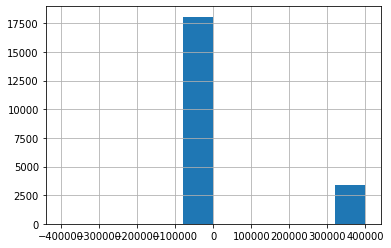

In [16]:
# Визуализируем столбец на гистограмме, чтобы увидеть выбросы и аномалии

data['days_employed'].hist(bins=10, range=(-400000, 400000))

На гистограмме видно, что справа аномальные данные, т.к. не может быть столько рабочих дней. 

Ещё на графике не совсем видны отрицательные значения, а они есть судя по разведке ранее.

In [17]:
# Также из разведки через head видели отрицательные значени. Посмотрим сколько их всего
print(data.loc[data['days_employed'] < 0, 'days_employed'].count())

18080


In [18]:
# Убираем минус у чисел и проверяем
data['days_employed'] = abs(data['days_employed'])
print(data.loc[data['days_employed'] < 0, 'days_employed'].count())

0


In [19]:
# Явно аномальные выбросы заменяем на медианные значения. Берём максимально допустимую цифру часов
data.loc[data['days_employed'] > 25000, 'days_employed'] = data['days_employed'].median()

При describe отображались странные аномалии в min и max у children

In [20]:
print(data['children'].value_counts())

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64


20 детей - это странное число и можно посчитать его за выбросы. А вот отрицательные значения переведем через модуль

In [21]:
data['children'] = abs(data['children'])

In [22]:
# Смотрим какое число у параметра "20"
print(data.loc[data['children'] == 20, 'children'].count())

76


In [23]:
# Работаем с количеством "20". Просто исключаем их из датасета

data = data.loc[data['children'] != 20]
print(data.loc[data['children'] == 20, 'children'].count())

0


Посмотрим также что с возрастом. Посмотрим по гистограме, д.б. что-то вроде нормального распределения.

<AxesSubplot:>

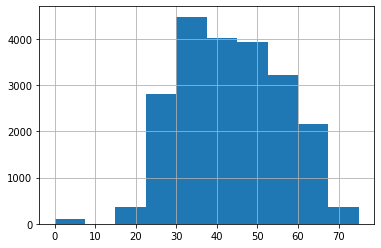

In [24]:
data['dob_years'].hist()

Видно, что есть странный выброс около нуля. Посмотрим на несовершеннолетних:

In [25]:
dob_years = data.query('dob_years < 18')

print(dob_years['dob_years'].value_counts())

0    100
Name: dob_years, dtype: int64


Ошибка могла быть из-за чего угодно - например, промахнуть по цифре круглого возраста. Просто уберём:

35    615
41    605
40    605
34    600
38    597
42    594
33    579
39    572
31    558
36    553
44    545
29    543
48    537
30    537
37    533
43    511
50    511
32    508
49    505
28    503
45    494
27    491
52    483
56    482
47    480
54    478
46    472
58    461
57    459
53    458
51    447
55    442
59    442
26    407
60    376
25    356
61    354
62    351
63    269
64    264
24    263
23    253
65    194
22    183
66    183
67    167
21    110
68     99
69     84
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64


<AxesSubplot:>

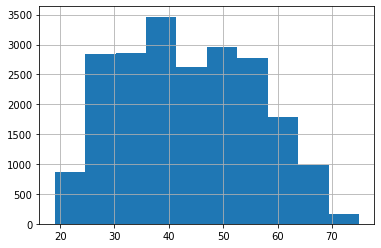

In [26]:
data = data.query('dob_years >= 18')

print(data['dob_years'].value_counts())

data['dob_years'].hist()

### Шаг 2.3. Изменение типов данных


In [27]:
# Меняем тип данных на integer (целочисленный) у total_income и проверяем
data['total_income'] = data['total_income'].astype('int64')
print(data['total_income'].dtypes)

int64


### Шаг 2.4. Удаление дубликатов.

Посмотрим сколько дубликатов у полей, где это возможно.

In [28]:
print(data['education'].value_counts())

среднее                13640
высшее                  4674
СРЕДНЕЕ                  768
Среднее                  702
неоконченное высшее      664
ВЫСШЕЕ                   271
Высшее                   266
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64


Явные проблемы с регистром. Одна из причин - человеческий фактор и отсутствия фильтрации данных на вводе. Разработчики не предусмотрели этого.

In [29]:
# Уравниваем регистр и проверяем на результат
data['education'] = data['education'].str.lower()
print(data['education'].value_counts())

среднее                15110
высшее                  5211
неоконченное высшее      740
начальное                282
ученая степень             6
Name: education, dtype: int64


In [30]:
# Смотрим на предмет регистра в других столбцах
print(data['income_type'].value_counts())

сотрудник          11022
компаньон           5043
пенсионер           3827
госслужащий         1451
предприниматель        2
безработный            2
в декрете              1
студент                1
Name: income_type, dtype: int64


In [31]:
print(data['family_status'].value_counts())

женат / замужем          12283
гражданский брак          4144
Не женат / не замужем     2788
в разводе                 1183
вдовец / вдова             951
Name: family_status, dtype: int64


Посмотрим на общие дубликаты строк.

In [32]:
# Смотрим на дубликаты строк
print(data.duplicated().sum())

71


Рассмотрим подробнее:

In [33]:
data[data.duplicated()].sort_values(by=['days_employed', 'dob_years', 'purpose', 'education', 'children']).head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
19321,0,1203.369529,23,среднее,1,Не женат / не замужем,4,F,сотрудник,0,142594,сделка с подержанным автомобилем
20297,1,1203.369529,23,среднее,1,гражданский брак,1,F,сотрудник,0,142594,сыграть свадьбу
18328,0,1203.369529,29,высшее,0,женат / замужем,0,M,сотрудник,0,142594,покупка жилой недвижимости
18349,1,1203.369529,30,высшее,0,женат / замужем,0,F,госслужащий,0,150447,покупка жилья для семьи
21281,1,1203.369529,30,высшее,0,женат / замужем,0,F,сотрудник,0,142594,покупка коммерческой недвижимости
6312,0,1203.369529,30,среднее,1,женат / замужем,0,M,сотрудник,0,142594,строительство жилой недвижимости
13878,1,1203.369529,31,среднее,1,женат / замужем,0,F,компаньон,0,172357,покупка жилья
16904,1,1203.369529,32,высшее,0,женат / замужем,0,F,сотрудник,0,142594,на покупку подержанного автомобиля
9238,2,1203.369529,34,среднее,1,женат / замужем,0,F,сотрудник,0,142594,покупка жилья для сдачи
4182,1,1203.369529,34,высшее,0,гражданский брак,1,F,сотрудник,0,142594,свадьба


Несколько странно выглядят дубликаты, которые дубликами и не кажутся. Не думаю, что их стоит как-то обрабатывать дополнительно.

### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма

In [34]:
#data_education = pd.DataFrame({'education': data['education'].unique(),
#                              'education_id': data['education_id'].unique()})

# Создаём Датафрейм education, копируем столбцы и дропаем дубликаты
#data_education = pd.DataFrame()
#data_education['education'] = data['education']
#data_education['education_id'] = data['education_id']

data_education = data[['education', 'education_id']].drop_duplicates()
        
# Проверяем результат
display(data_education.head(10))

,education,education_id
0,высшее,0
1,среднее,1
13,неоконченное высшее,2
31,начальное,3
2963,ученая степень,4


In [35]:
#data_family = pd.DataFrame({'family_status': data['family_status'].unique(),
#                              'family_status_id': data['family_status_id'].unique()})
#display(data_family.head())

# Создаём Датафрейм family, копируем столбцы и дропаем дубликаты
#data_family = pd.DataFrame()
#data_family['family_status'] = data['family_status']
#data_family['family_status_id'] = data['family_status_id']

data_family = data[['family_status', 'family_status_id']].drop_duplicates()
        
# Проверяем результат
display(data_family.head(10))

,family_status,family_status_id
0,женат / замужем,0
4,гражданский брак,1
18,вдовец / вдова,2
19,в разводе,3
24,Не женат / не замужем,4


In [36]:
# Удаляем уже ненужные столбцы
data = data.drop(columns=['education', 'family_status'])
display(data.head(3))

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья


### Шаг 2.6. Категоризация дохода.

Присвоим разным диапазоном дохода метки, чтобы было удобно анализировать и отвечать на поставленные вопросы.

In [37]:
# Пишем функция, чтобы её потом применить к таблице
def def_income(row):
  if row['total_income'] <= 30000:
    return 'E'
  elif row['total_income'] > 30000 and row['total_income'] <= 50000:
    return 'D'
  elif row['total_income'] > 50000 and row['total_income'] <= 200000:
    return 'C'
  elif row['total_income'] > 200000 and row['total_income'] <= 1000000:
    return 'B'
  else:
    return 'A'

# Применяем через apply
data['total_income_category'] = data.apply(def_income, axis=1)

# Проверяем результат
print(data['total_income_category'].value_counts())

C    15958
B     4996
D      348
A       25
E       22
Name: total_income_category, dtype: int64


Средней категории явно больше.

### Шаг 2.7. Категоризация целей кредита

Из разведки ранее было видно, что нет единого стандарта и категорий в `purpose`. Устраняем этот недастаток.

In [38]:
print(data['purpose'].value_counts())

свадьба                                   791
на проведение свадьбы                     769
сыграть свадьбу                           765
операции с недвижимостью                  672
покупка коммерческой недвижимости         658
покупка жилья для сдачи                   650
операции с коммерческой недвижимостью     645
операции с жильем                         643
покупка жилья для семьи                   639
покупка жилья                             638
жилье                                     637
операции со своей недвижимостью           629
недвижимость                              629
строительство собственной недвижимости    627
строительство жилой недвижимости          622
строительство недвижимости                620
покупка недвижимости                      619
покупка своего жилья                      619
ремонт жилью                              608
покупка жилой недвижимости                602
на покупку своего автомобиля              502
заняться высшим образованием      

In [39]:
# Функция категоризации по целям кредита
def def_purpose(row):
  # Проверяем значение на вхождение ключевых слов и присваиваем категорию
  if 'автомобил' in row['purpose']:
    return 'операции с автомобилем'
  elif 'жиль' in row['purpose'] or 'недвижим' in row['purpose']:
    return 'операции с недвижимостью'
  elif 'свадьб' in row['purpose']:
    return 'проведение свадьбы'
  elif 'образов' in row['purpose']:
    return 'получение образования'

# Применяем функцию
data['purpose_category'] = data.apply(def_purpose, axis=1)

# Проверяем результат
display(data['purpose_category'].value_counts())

операции с недвижимостью    10757
операции с автомобилем       4278
получение образования        3989
проведение свадьбы           2325
Name: purpose_category, dtype: int64

#### Выводы предобработки:

Были странные, но терпимые по доли выбросы в доходе и возрасте. Также ошибки с отрицательными значениями, которые удалось поправить через модуль.

Решена проблема с регистром значений.

Неоднородные категории в целях кредита, которые пришлось объединить в общие категории.

Два столбца вынесены в отдельные словари.


### Ответы на вопросы

##### Вопрос 1: **Есть ли зависимость между количеством детей и возвратом кредита в срок?**


   children   sum    len  mean
0         0  1058  14080  7.51
1         1   442   4849  9.12
2         2   194   2042  9.50
3         3    27    328  8.23
4         4     4     41  9.76


<AxesSubplot:xlabel='children', ylabel='mean'>

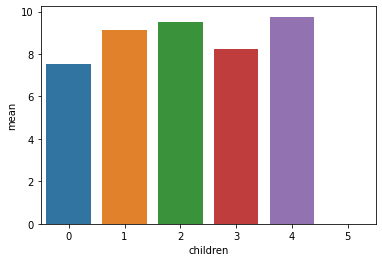

In [40]:
import seaborn as sb

# Сведём таблицу, чтобы писать меньше кода и просуммировать значения
data_pivot = data.pivot_table(index='children', values='debt', aggfunc=[sum, len, 'mean']).reset_index()
data_pivot.columns = ['children', 'sum', 'len', 'mean']
data_pivot['mean'] = round(data_pivot['mean'] * 100, 2)
# Выносим коэффициент просрочек
#data_pivot['ratio'] = round(data_pivot['sum'] / data_pivot['len'] * 100, 2)

# Выводим результат в графике и таблице
print(data_pivot.head())
sb.barplot(x='children', y='mean', data=data_pivot)

##### Вывод 1:

Зависимость минимальная. Но на графике видно, что у бездетных больше вероятности отдать кредит без просрочек, чем у тех, у кого есть дети. При четырёх детях - риски максимальные.

##### Вопрос 2: **Есть ли зависимость между семейным положением и возвратом кредита в срок?**


In [41]:
# Импртируем либу, чтобы поправить легенду
import matplotlib.pyplot as plt

# Сведём таблицу, чтобы писать меньше кода и просуммировать значения
data_pivot = data.pivot_table(index='family_status_id', values='debt', aggfunc=[sum, len, 'mean']).reset_index()
data_pivot.columns = ['family_status_id', 'sum', 'len', 'mean']
data_pivot['mean'] = round(data_pivot['mean'] * 100, 2)

# Выносим коэффициент просрочек
#data_pivot['ratio'] = round(data_pivot['sum'] / data_pivot['len'] * 100, 2)

data_pivot = data_pivot.merge(data_family, on='family_status_id', how='left')

# Сортируем и выводом
print(data_pivot.sort_values('mean', ascending=False).head())



   family_status_id  sum    len  mean          family_status
4                 4  272   2788  9.76  Не женат / не замужем
1                 1  383   4144  9.24       гражданский брак
0                 0  924  12283  7.52        женат / замужем
3                 3   84   1183  7.10              в разводе
2                 2   62    951  6.52         вдовец / вдова


##### Вывод 2:

Зависимость также минимальная. В таблице видно, что меньше рисков у потерявших партнёра и тех, кто в разводе, т.е. у тех, кто был в браке. 

У холостых - риски больше всего.

##### Вопрос 3: **Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

  total_income_category   sum    len  mean
4                     E     2     22  9.09
2                     C  1347  15958  8.44
0                     A     2     25  8.00
1                     B   353   4996  7.07
3                     D    21    348  6.03


<AxesSubplot:xlabel='total_income_category', ylabel='mean'>

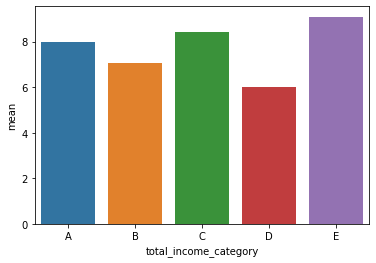

In [42]:
data_pivot = data.pivot_table(index='total_income_category', values='debt', aggfunc=[sum, len, 'mean']).reset_index()
#data_pivot['ratio'] = round(data_pivot['sum'] / data_pivot['len'] * 100, 2)
data_pivot.columns = ['total_income_category', 'sum', 'len', 'mean']
data_pivot['mean'] = round(data_pivot['mean'] * 100, 2)

print(data_pivot.sort_values('mean', ascending=False).head())
sb.barplot(x='total_income_category', y='mean', data=data_pivot)


##### Вывод 3:

У людей с низким уровнем дохода выше всего. Меньше всего у людей с доходом между 30000 и 50000 рублей.

##### Вопрос 4: **Как разные цели кредита влияют на его возврат в срок?**

           purpose_category  sum    len  mean
0    операции с автомобилем  398   4278  9.30
2     получение образования  369   3989  9.25
3        проведение свадьбы  181   2325  7.78
1  операции с недвижимостью  777  10757  7.22


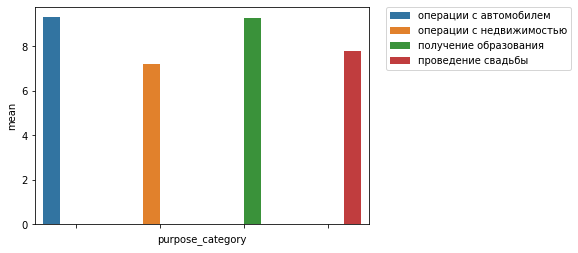

In [43]:
data_pivot = data.pivot_table(index='purpose_category', values='debt', aggfunc=[sum, len, 'mean']).reset_index()
data_pivot.columns = ['purpose_category', 'sum', 'len', 'mean']
data_pivot['mean'] = round(data_pivot['mean'] * 100, 2)
print(data_pivot.sort_values('mean', ascending=False).head())

graph = sb.barplot(x='purpose_category', y='mean', data=data_pivot, hue='purpose_category')
# Убираем подписи из-за нечетабельности
graph.set(xticklabels=[])  
# Выносим легенду за график для читаемости
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


##### Вывод 4:

Риск просрочить меньше всего у тех, кто берёт кредит на недвижимость. Больше всего у тех, кто берёт на автомобиль или образование.

## Общий вывод:

* Сначала выполнили обзор, проверили корректность столбцов и измерили количество строк со столбцами
* Сделали предобработку данных, устранив дубликаты, регистр, пропуски и выбросы
* Провели исследование и ответили на поставленные вопросы


## Выводы исследования

Опишем персонажа у которого риски просрочек по базе максимальные:
* У человека четверо детей
* При этом он в гражданском браке или холост
* С минимальным уровнем дохода (меньше 30 т.р.)
* Деньги взяты на автомобиль или образование

Меньше всего у человека:
* Бездетного
* В разводе или вдова/вдовец
* Зарабатывает от 30 до 50 т.р.
* Деньги взяты на недвижимость

Но ещё раз напишу, что зависимость минимальная.


### Рекомендации

* Унифицировать категории в колонке целях кредита `purpose`
* Ввести проверку на ошибки в вводе данных, особенно с отрицательными значениями

In [44]:
# Вопрос для развития - можно ли по корреляции определить зависимости и ответить на главные вопросы исследования?
display(data.corr())

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
children,1.000000,-0.033584,-0.320915,-0.027555,-0.158335,0.024898,0.032289
days_employed,-0.033584,1.000000,0.174517,-0.019115,-0.065565,-0.056403,0.049155
dob_years,-0.320915,0.174517,1.000000,0.065372,-0.068803,-0.072198,-0.061502
education_id,-0.027555,-0.019115,0.065372,1.000000,0.009281,0.052396,-0.172268
family_status_id,-0.158335,-0.065565,-0.068803,0.009281,1.000000,0.020656,-0.007514
debt,0.024898,-0.056403,-0.072198,0.052396,0.020656,1.000000,-0.012304
total_income,0.032289,0.049155,-0.061502,-0.172268,-0.007514,-0.012304,1.000000
